In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet #pystan도 설치하니 에러가 안 생기는 듯?
from datetime import datetime

In [7]:
import platform
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# pinkwink 웹 유입량

In [8]:
pinkwink_web = pd.read_csv('../Reference/data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


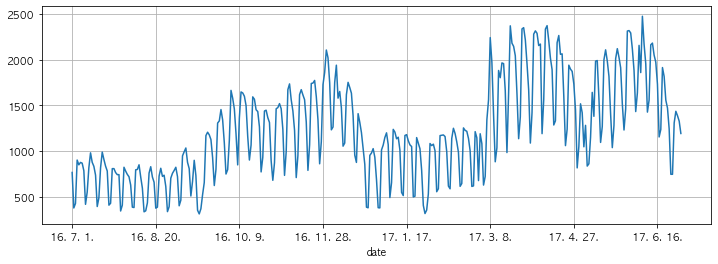

In [10]:
pinkwink_web['hit'].plot(figsize=(12,4), 
                         grid=True);

2016년 11월 28일 ~ 2017년 4월 27일

In [11]:
time = np.arange(0,len(pinkwink_web)) #시간축
traffic = pinkwink_web['hit'].values #유입량 자료

fx = np.linspace(0, time[-1], 1000)

회귀(regression): 현재 데이터를 간단한 모델로 표현하기

In [12]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [13]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.6284101894695
429.53280466762925
330.47773021321143


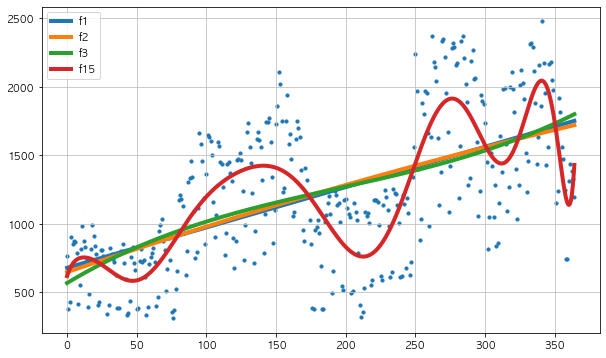

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

# 7-2 Prophet 모듈을 이용한 forecast 예측

prophet은 예측을 위한 모듈인 듯

In [15]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)

df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.") #날짜로 변경
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True) #주기성이 연단위, 일단위 가능한 듯
m.fit(df);

In [16]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,900.611910,693.703459,1097.508070
421,2017-08-26,485.482790,280.012948,674.128384
422,2017-08-27,618.155087,423.237894,835.887566
423,2017-08-28,1170.989096,975.011934,1379.047430
424,2017-08-29,1207.006811,997.454382,1418.126070


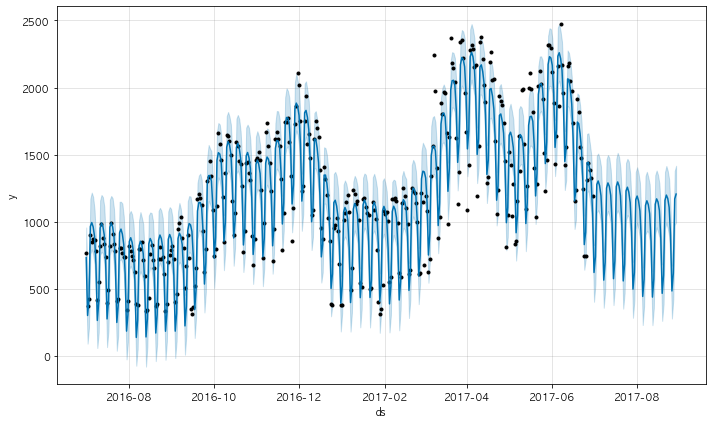

In [24]:
m.plot(forecast); #2017년 6월 이후 예측치에 대한 그래프, ;를 안 넣으면 2개 그려짐

* 전체적으로 유입량이 상승 중이다.
* 월화수 방문자가 많다
* 방학기간에 줄어든다
* 새벽시간에 늘어난다

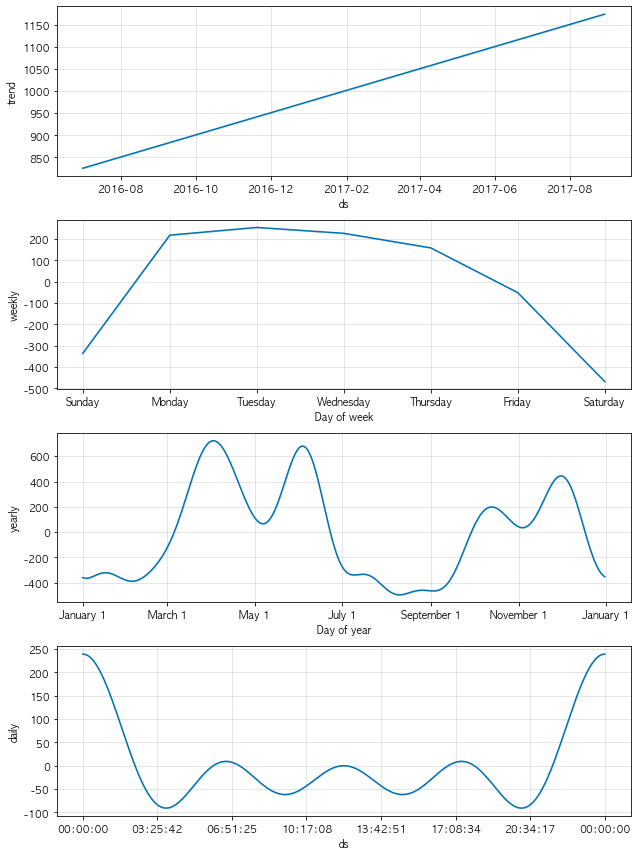

In [23]:
m.plot_components(forecast); #trend, weekly, yearly, daily 분석

# 7-3 seasonal 시계열 분석으로 주식데이터 분석하기

In [44]:
start_date = datetime(2003, 1, 1)
end_date = datetime(2019, 12, 31) #날짜를 책과 달리 함

KIA = web.get_data_yahoo('000270.KS', start_date, end_date)
KIA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-01-02,9200.0,8950.0,9000.0,9190.0,688900.0,7143.416016
2003-01-03,9720.0,9330.0,9350.0,9550.0,1419800.0,7423.246582
2003-01-06,9760.0,9500.0,9720.0,9700.0,1076300.0,7539.842285
2003-01-07,9920.0,9420.0,9900.0,9420.0,1034100.0,7322.196777
2003-01-08,9740.0,9400.0,9500.0,9520.0,599800.0,7399.926758


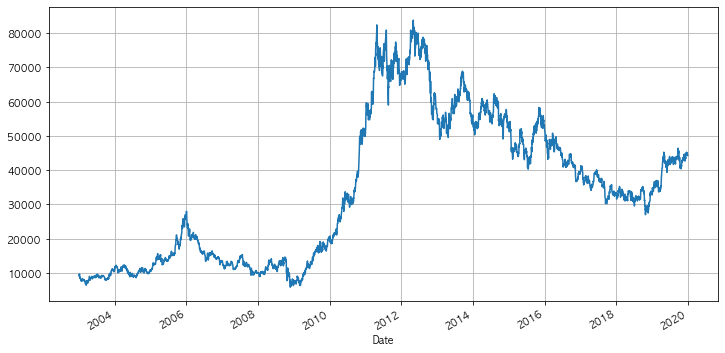

In [45]:
KIA['Close'].plot(figsize=(12,6),
                  grid=True);

In [46]:
KIA_trunc = KIA[:'2016-12-31'] #16년 12월 31일까지 데이터
KIA_trunc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-01-02,9200.0,8950.0,9000.0,9190.0,688900.0,7143.416016
2003-01-03,9720.0,9330.0,9350.0,9550.0,1419800.0,7423.246582
2003-01-06,9760.0,9500.0,9720.0,9700.0,1076300.0,7539.842285
2003-01-07,9920.0,9420.0,9900.0,9420.0,1034100.0,7322.196777
2003-01-08,9740.0,9400.0,9500.0,9520.0,599800.0,7399.926758


In [47]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']}) #16년까지의 데이터프레임
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2003-01-02,9190.0
1,2003-01-03,9550.0
2,2003-01-06,9700.0
3,2003-01-07,9420.0
4,2003-01-08,9520.0


19년 12월 31일까지 예측

In [48]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [49]:
future = m.make_future_dataframe(periods=1095)
future.tail()

,ds
4562,2019-12-25
4563,2019-12-26
4564,2019-12-27
4565,2019-12-28
4566,2019-12-29


In [50]:
# 책에는 없는데 이걸 해줘야 함
forecast = m.predict(future) 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4562,2019-12-25,22596.600576,-32827.729774,79857.163957
4563,2019-12-26,22537.152420,-31477.750856,80445.631302
4564,2019-12-27,22441.546653,-32031.048915,80572.982343
4565,2019-12-28,22563.869261,-32989.264229,80700.867838
4566,2019-12-29,22535.068593,-32010.768830,80988.325957


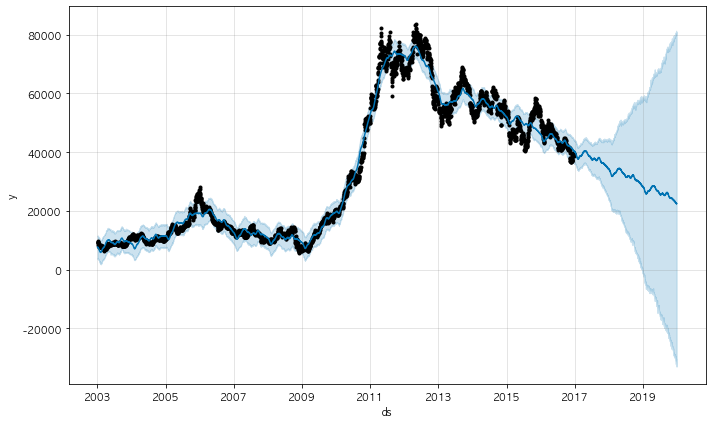

In [51]:
m.plot(forecast); # 예측기간이 멀어질 수록 오차가 커진다

* 원래는 떨어지는게 예상치
* 금요일에 떨어지네?? 토요일,일요일은 장이 안 열리니 쓰레기값
* 연초에 주가가 떨어진다
* 시간은 별로 중요하지 않은 듯

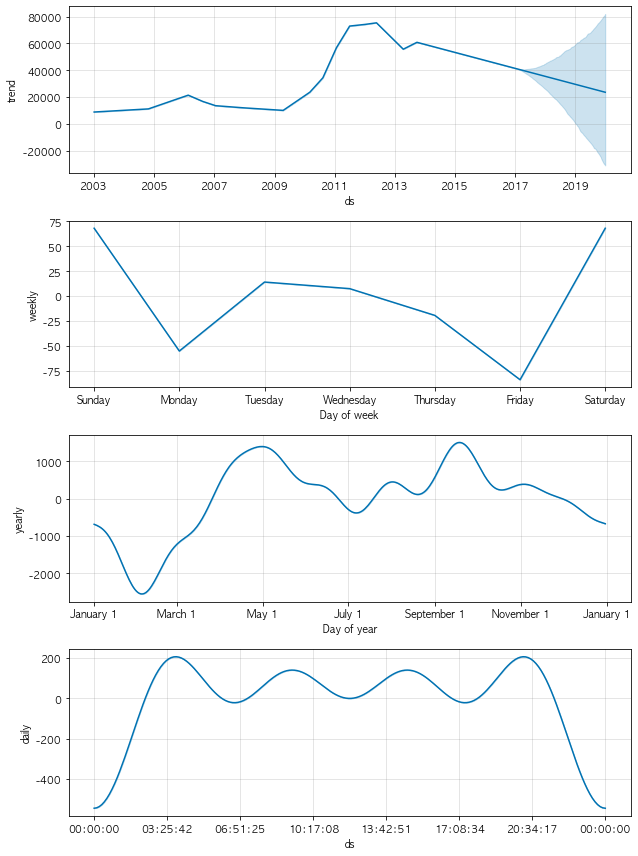

In [52]:
m.plot_components(forecast);

주가 기간을 다르게: 14년 1분기 ~ 20년 2분기

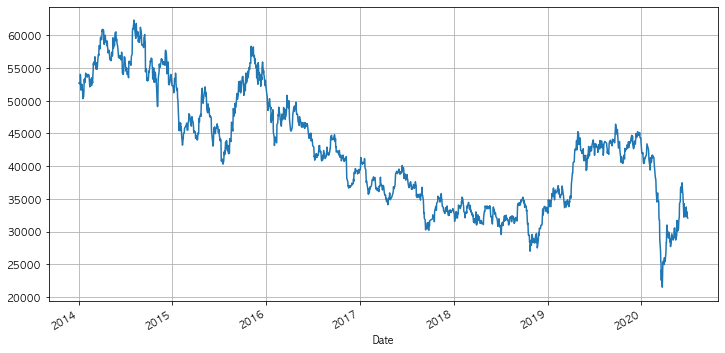

In [54]:
start_date_alt = datetime(2014, 1, 1)
end_date_alt = datetime(2020, 6, 30)

KIA_alt = web.get_data_yahoo('000270.KS', start_date_alt, end_date_alt)
KIA_alt['Close'].plot(figsize=(12,6), grid=True);

기간: 19년 4분기

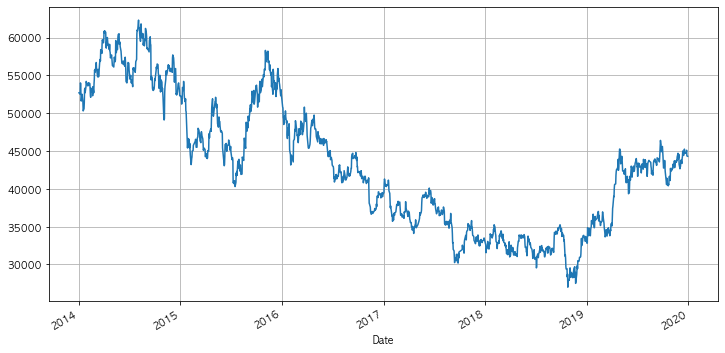

In [55]:
KIA_trunc_alt = KIA_alt[:'2019-12-31']
KIA_trunc_alt['Close'].plot(figsize=(12,6), grid=True);

In [56]:
df_alt = pd.DataFrame({'ds':KIA_trunc_alt.index, 'y':KIA_trunc_alt['Close']})
df_alt.reset_index(inplace=True)
del df_alt['Date']

In [57]:
n = Prophet(daily_seasonality=True)
n.fit(df_alt);

In [58]:
future = n.make_future_dataframe(periods=61)
future.tail()

,ds
1522,2020-02-25
1523,2020-02-26
1524,2020-02-27
1525,2020-02-28
1526,2020-02-29


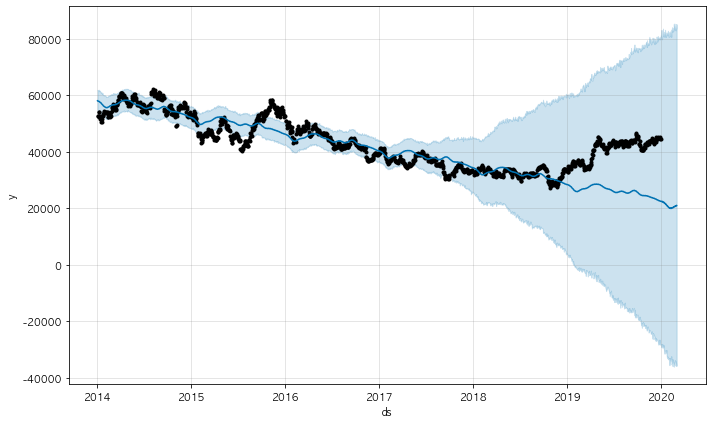

In [60]:
forecast = m.predict(future)
n.plot(forecast);

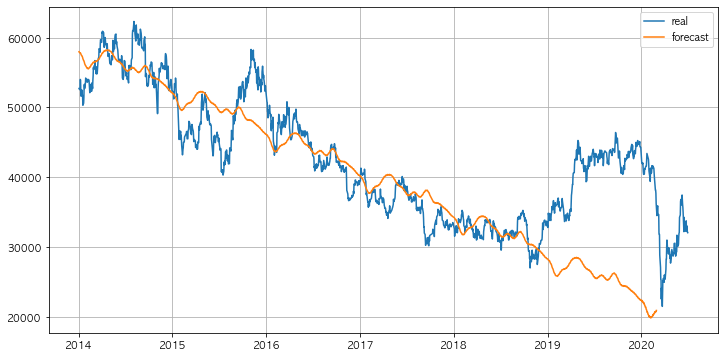

In [61]:
plt.figure(figsize=(12,6))
plt.plot(KIA_alt.index, KIA_alt['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## 7-4 Growth Model과 Holiday Forecast

In [62]:
df = pd.read_csv('../Reference/data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [63]:
df['cap'] = 8.5

In [64]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

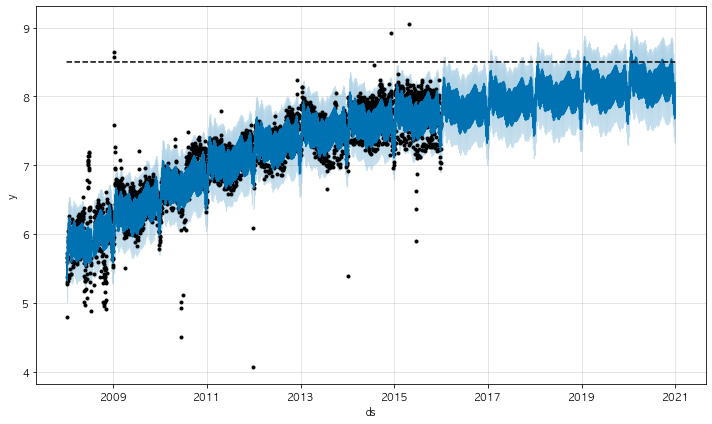

In [65]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

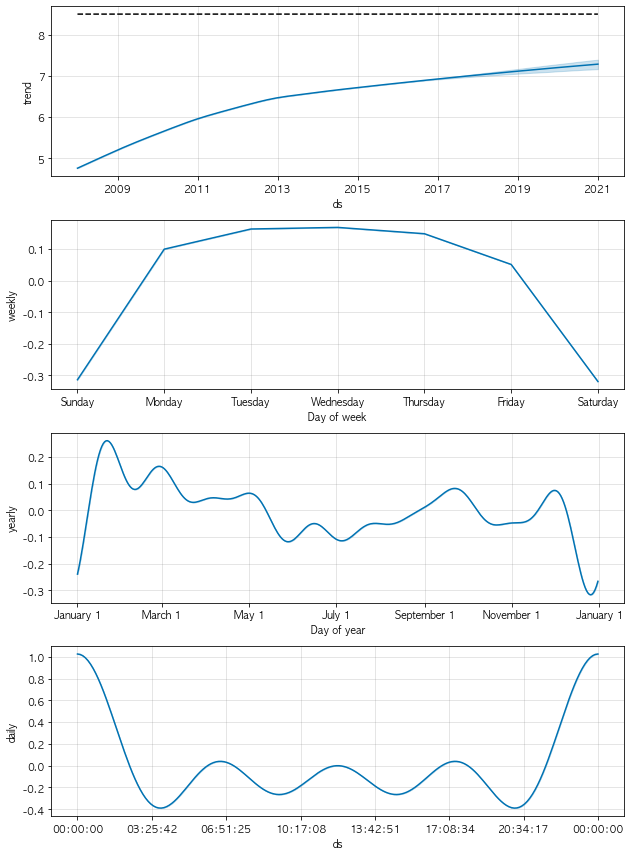

In [66]:
forecast = m.predict(future)
m.plot_components(forecast);

# 카카오맵 DAU

In [135]:
df = pd.read_csv('./data/kakaomap_dau.csv',
                thousands=',',
                 header=0,
                names= ['ds', 'y', 'day of week', 'note'],
                parse_dates=['ds'])

del df['day of week']
del df['note']

In [136]:
df.head()

,ds,y
0,2017-01-01,380614.0
1,2017-01-02,425448.0
2,2017-01-03,432401.0
3,2017-01-04,443169.0
4,2017-01-05,445335.0


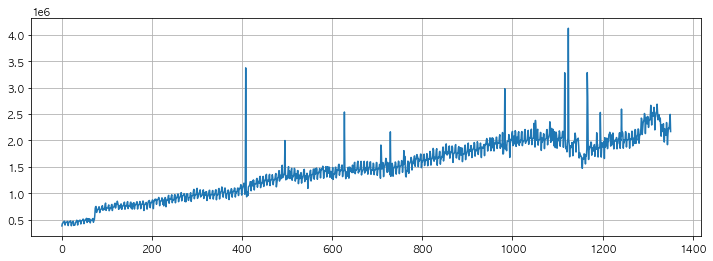

In [137]:
df['y'].plot(figsize=(12,4),
               grid=True);

In [138]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [139]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4684,2020-12-26,2.312036e+06,2.138854e+06,2.490281e+06
4685,2020-12-27,2.115726e+06,1.941846e+06,2.300040e+06
4686,2020-12-28,2.225697e+06,2.056995e+06,2.407707e+06
4687,2020-12-29,2.234575e+06,2.051771e+06,2.413484e+06
4688,2020-12-30,2.240749e+06,2.053946e+06,2.429297e+06


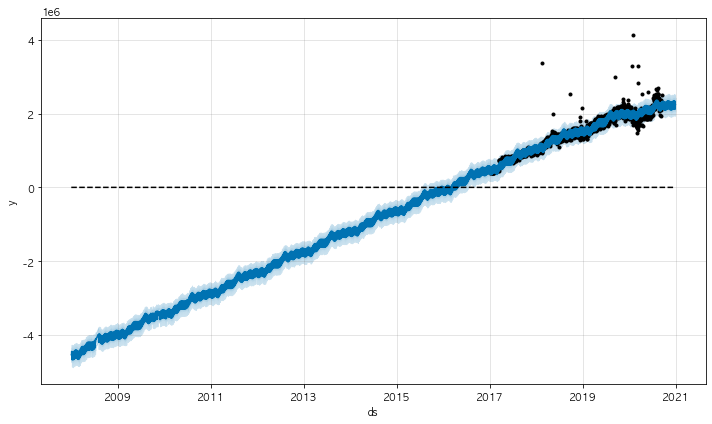

In [140]:
m.plot(forecast);

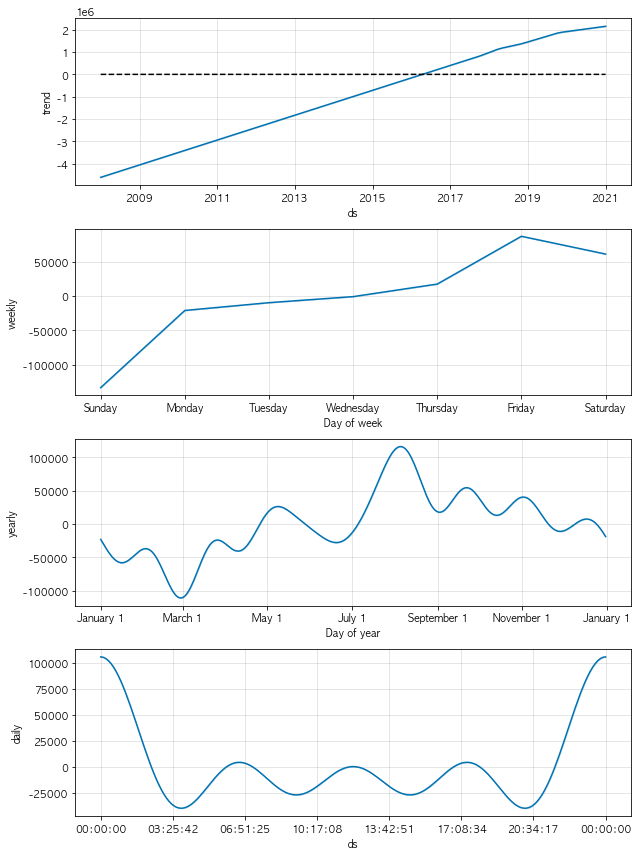

In [141]:
m.plot_components(forecast);